# KNN regression experiments

In class we learned about how KNN regression works, and tips for using KNN.  For example, we learned that data should be scaled when using KNN, and that extra, useless predictors should not be used with KNN.  Are these tips really correct?

In this notebook we run a bunch of tests to see how KNN is affect by the choice of k, scaling of the predictors, presence of useless predictors, and other things.

One experiment we do not run, and which would be interesting, is to see how KNN performance changes as a function of the size of the training set.

## INSTRUCTIONS

Enter code wherever you see # YOUR CODE HERE in code cells, or YOU TEXT HERE in markup cells.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
# set default figure size
plt.rcParams['figure.figsize'] = [8.0, 6.0]

In [3]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

### Read the data and take a first look at it

The housing dataset is good for testing KNN because it has many numeric features.  See Aurélien Géron's book titled 'Hands-On Machine learning with Scikit-Learn and TensorFlow' for information on the dataset.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/housing.csv")    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note that numeric features have different ranges.  For example, the mean value of *'total_rooms'* is over 2,500, while the mean value of *'median_income'* is about 4. *'median_house_value'* has a much greater mean value, over $200,000, but we will be using it as the target variable.


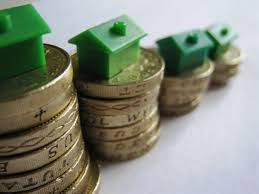

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBIVFRgVFRYYGBgYGBgZGBgYGBgaGBoaGBgZGRgYGBgcIS4lHB4rHxgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHzQhJCs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAMIBAwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAAECBAYDBwj/xAA4EAACAQIEAwYEBQQDAQEBAAABAgADEQQSITEFQVEGImFxgZETMkKhUrHB0fBicuHxFBWCsnMj/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAJREAAwEAAgICAQQDAAAAAAAAAAECEQMhEjFBURMiMmFxBEKB/9oADAMBAAIRAxEAPwAwIz10X5mVfMgTG1MZXfd28gbflKbhr969/Gc/5d9HG/8ALX+qNpU41h1+vMf6QT99pCn2gQkBUNupIB9hMcstUqlpFclfBjf+TyfHR6ZhijqGXUGWVEyHAOJ5DlY90/Y9Zr1M7OK1U6jq4eZck78/JMSayAjqZoanUSYM5AyYgBISQMhHBiAmJKQvFeAE7yQM5iR+Ol7XF4niDTvFeRvFeBRK8UjJQAcRxGEeADxRhHgAorR7RQAaKKNAkRkTHJjQAeNFHjAUUe0UAPCOH4uzAiXMaLtm6iZ7A1dRDj1cwHhPO8cZ5dS5ohaTVpC0kogSy1Qq2M2nZ/iWYBGOo+U/pMKgl/CVipve1ootxWomLfHWr/p6WI4lHhWL+IgbmND5y8J6SpNaj15pUk0TEkDOd5JYxk7xxKWO4jSormqOF6D6j5DcwVU7QFxemAAdmOp9hoJnXJKefJFXM+2aJ3VRdiAPEyhW4sg0TvHry95n3qs5u7FvP9pQ4txX4CZgLnYCRXIzN82+g5ieLnXM1gtswXlfa8hhcWr3KG9t9DPMm4w7uzndjc2mn7LYpmfLmOU3JF9DbqJzflp1jXRzvlvySa6PQsFjL6GEBM8i84RwOLOzTpms9nXNZ0wlHEYSU1NhRRRQAQkpEsBOT4pBzgLUd4oNfi9MTjjuOU0F7gRNpC85CzMBICoIKwtY1O9fSNxXiVOgl2MXks0irSC4a8jAPA+MrXuV5G0PiE0qWoc0qGkrxRrSjQleKNFGSeB0cMq8paUSjUxyjnKtTiJO08/Ko8/wqgznA5yD4pFgF8U55+0gCY/xv5KXB9sP08XmNhN3wDglBqau4Lsb3udPaeb4A2ImtTtNVwyoi00dSCTdyrA32GhEONzN4xcUz+bxa3o39CkiCyKFHQC07CYrCdv8ObCrTqUj1sHT3XX7TV8Px9Ksuek6uOqm9vMbj1nbNS/R6Hjh2xOKp01LOwVRzJmL4325tdcOLf1tv/5X95o+PcDXFKoZ2Qre1rHfqDPOe1PZqphQrlw6sSBYEEG19RMuXz+OkZW6+PQJxnEajsWdixO5JuZf4PxgobHVTuJnmMZHImHgvgwriTR6nQxCuoZTcfzQylxTBmotrTJcJ4s1NhrpzHIzdYDEpVUMh8xzEqa3qvZl3uMyydl2Y6aTR8B4G1Bs5cNpsB18YZoUGO0fEYunTFic7jkD3R5mNqV2y8XtlxATrsBuTIU8VmbLSXOw3b6B6zJ8S4vUqd0HToNF/wAzQ9ksdTpoVdgGY315xTaqkvSLluqU+jTYGjUUd98xPTYeAnWviEQXYgTk3EKY+qYftyzVEzI5AG6g7+c6dSXR1NeM9B7iXbLC0rjOGPQan7QTgu24rMVUZel+c8qqOY+GxBRgwOombqjCqprpnsh4g7bmZnjHataNQKO9bcSPD+K/ES4PetrM3xLhLVHJ1uZTeroy8t6bw0vCuN/GqW1sdhC3EcD8VCp3tpAPZngxpHOzctpocRxCmu7CCXXZKSSesA8E4zUwz/Bqk5b2Vjy8D4TQ8ZwX/KUAHSY/tNj6VRbi2Yc5b7LcfemmV9R9J/SZNqXnwVD1Z8G27P8ACkwqWv4+JhelXZm0Gkx1Di71ag/CJsMBiFIAE0ipfSOiJLwEe0eNeamw9oorxQA+YrxRpITAyEJ1Sc1nRZLJZfwzaiHMRlyIz6oL5lBsW07oHrM/hzrDuIXNQ8mB/T9Zy31SOVdc8sG4ioCSVFgTovIeHj5yFB6lNhUosUca902uP5yjgW2t6i8kOV73uOfLoJqnh6p6F2Y7Wf8AIQrUstRRe+gDAbm3Ijn7wH264xTqqERi2Vrlvp2IsDz/ACgLg1EtVYLexVyfIISfyEp4zEXRr6nr0l1dVi+CaleLBLmc8xkWeQzTRIwSLKViJpOz+NZWBQm45Ha0yimaPsyt3P8AbMeWVmmPLCZtcTxh3FvlH4V0HqYOa7b+3KdDT8JNKZtMHTYpnP5HpURJ8UwwyLZbnr0joh850xNRhZfC0lN+RtxR+rQGr1Nlcm3IkzjiMUzIVO8M8Q4cqZSneLC7DpBWJo5VOhzDUTZPs6mtWGQqkgmc80MceweVEqgaNofOAs06perTnc50GOFYtka4OnOab/tVUXA1mQwHMy6XiXRzVx7QWxPGKjc7eUqrUJzE8hKBqiFeEU84bTTaDpJaxPh+EZepVLORfnNRwugWACzjjuzLqRUX5TrCvCFyWPSZW99HWuM1vB+D5EzMe8YRU5e8Os4YHFhlAJELI1FQDufH9opxLo2SwKIpyjykTOS4rMNJMNOydwhk7xpG8Uok+aI4kc0kAx2HvObCMbJCPnH+BvH+F1N/LadUQcrCIPH7J0VbyHjv7QrRa6FSSYNS4lqibkbj2t6zG50XgtTRBn3A9NvbWdnGXTQ22I5k/tOuGoOxyImdnIsALtpsB0E9A4D2Vp4UCvjMrVTqlHdVPJm/bbzlJb2/R1JkOzfZ1sPh3rVBarWXKq80ptvcci21uk8t4m2VnT8LMvsxE9v4hxD4i777k/zSeFcWqBqtQjm7/wD0Yoflb+h0sQOzRw0ZgJzM6jLCwhmp7Jauf7T+kyKMZqOyVTvkWYnKdAJhzL9JjySzYuLC/STweWoua9htfmfKcKdAu2Vz1OQHTT8R5+UII4AsAAByHKcmfZUT9lklESyC9+dtZVWrTs+c2OXukjW/hOL4o6WA56HT2POV+IC+S48Trrryv4Rp9myKJr1GBKnRbX8+UZ0rO1mGZjYAD/Evpw7MBpkA3dzYnyXcwlhq9Ogp+GMzkWNRt/HKOQmiRa7Mz2+prRw1CiNXuXfoD0vz3+0wIebvtypqtSVWvlTXXmZlP+nqTomkpIqdZHDPYTuMxnahw1l3EI4fAseUHSIXGLhnBS+rGwms4Zw8IuRBcnpKWARF0ZtBNFh+N0qa2ppcnS9rfczKm6NFGEO0FMYfDBWIzfqdbTFDFCXu0fEWqv3jtsOQg6nRUyszotHfDVqjNZWI9TNTwHDnOC7Fj4k6e8AYDBuzWT3m54JworqxueZjmG2KngcpgWFpIRwtoiJ1IyHvFIRRknzgiTqmkdEnRQJztjwgoN9J3p0mJ6eJkkXoJfwmCznvN6D8pDoanSt8JdgSWvyGk0PCezNV8jPakjbO+5HUCLC0VSxRACObbwi+KdwA7Ehb5RyW/QTNstcf2HOH4rC4UFcMmdzcGq3UaXXqIPxGLfV2YsxOpJJJlRGOlpYpIW0/P85D7NUkhV6zZHNwAq3vzueQ6k/pPLsUoWo45XuL9Jv+KVcoKDkfQnxmL4/RIu9hfPYga7g7HYjSacPT/siitToKwJ2tv5Sx/wBUp1Bg3D4o9bQzhsXfczWvJehLGNS4UQb3BhvhQakxIQm4sbZf3lalUH89Jep1v56zGm37K8JZcGJIIIRx0JYdNdjJtiX30HmRKxfS/QfpKzVVcDuubEH5eV+snxQeEhFnqbZ7eUgK9ySFY257DTpzkEckXtl30P2vILWvoWBPRBDEV4pF1HY2J3O+pJ9zrL+HwzOCegvOeBpoy31vyFtPUzvj8UKdF+XdI08ZSWiZh61ctUYnqZdwyE9YHwmr38YaR2G0poaLNVWA0EnRoneMKj2uZ3DsRpEBzTDNckwnQpqqk9BKtHD1H0l+pgmC5Y5TbE3hh+Iu7VCR1nTBpUJ2mro8AXcwxguEIvKb+OkOjj2cwrAAsNZt6C2AlHAYUDlCgE1lYjNvSBjGSYSEYCiiijJPnynhmPIyynD2PQS/TEspOJ0zoUoq0OGrfW5hJFVRoIwX+fedSo2JtJbKwdGnRLyBsAbWNvQStheI03A7wLEkBeRy72HMeMnGx6GKNPT9f2lsuALDeUUYnnLDVadMBn3OirzJ/TzkukhZpyqYE6HQu5Kop1uebW6KLn0ECds8AEw4UC7i1R7A90EqiA36gFv/AFNtwjDBQcXiVNyuVE/CN8g5eZ8BMp2rrk4euzZs1Ug3IsCFvfL1tdfAARxvkmFesPPKNOmwsV16g/pO44aPpciVcOw6mEUJ0sdOhnTWr0ZykyC8Orj5XnWnQxnIk+hlqifBx5awnh3qDkSP6tPykOmWpQNoYXGn6rf+ZdTh+J+qqfTKJYL1D8ylv7Xt9tJEUXb6Qg8SS37SNbH4kF4dYXdyfNiftCGAoJe4Qgcr8/SKngrgd5rjx1hDB4MC+p6m5udID9FjA5yO9YG+ltrcpQ7WKfg2XYbw3h7Fe5sSAD+cq9ucMEw1ie+xGnhHJDZhcC+whjOAJm8M4HOXQ9/qlOexphyjXspJIip40BhY3J5CB1S+7S1hkAIy6nlFgabPhilTme1zsBsP3MMilfWCeBcPqMQ9Qn+kdJqUoTXijFpnVFFMPLuHw0sJQlmmlpskRoqa2nQRWiMYETI2kmkYANFJRRkniiMOs7LUA2HvKgeOHN5xYdIQNU26eUiHF77nqZTOIA3P8/3OFbiKLzk4PS1inrM2hCoFNzuSfDpH4UtOnTQ6XIzFuZJ3gZ+LltEG5tfl6nadcJRqPlzEAXIyj5SOWo19o2nmehdaHjxfUrTGZhlvqNATa4vufAQ9wjAIh+NXJd7d1RozC5KlhcqttP8AMocPwNOitrZjly3bZRzyD6T4y65ZaZcISi21BAzE9CxGc3PK5mXitHoVrY3OxdgCFACJ9J/Cp8BuevrAHaXDtVpVnZrhFCA8mqOSSBbkBmNugEL4ZCLZAxdtATuC3JByOtufpBva10REoIfku7m3zu9wbk7hQBY+csR5TRItrCFEWA3Hje8GspDEEbE/nLdJ72BJsNdvznQ0ZoMU1ItdgL6DS+vTSHcNhHsO+trfhN/zmaWupKkMO6b2M0eDxqfW6AW5NreY0jRMu0cH+Ij0Esf8cAGxN/S0rLxfDjQuPTWQPGadzkV38gbScHpH/nEUwygEhgGsPG2UeMK4fQEnRn99tBaCKb1CLIi00vcltTrzl/AoqnMGLPzY+MT/AIDA7wt6dGmrNY22A68iRBvaZGrIzudheWsJh2ew6nbrF2uZUpiimrMQCRBPsTR5WmCflLtDhlRjNjheD2AuOUMYXhqjlOpLSG8MpgOztRrZjaa3hXAKaWNrnqYTw+HAhPD0ZUwiXRLDUgBoJaVYypadQJoSJRJARpKAEY5jXivACJjRNIkxkjxRrxQA+dH4wo0Gs4PxWodry3S4IOZl2jwemN9ZzbJtjAQqVH5y3heGOxBN99z+00VHDU0FyoA6mWadd20RAB+Jtumgkuvoan7K2A4EBq2g3tz/AMQvhsPTQXFh435efrKTOVtndmY7Iul+ew5S1h6drs9tfpPyKPXc7azNss7pULsCbqt7qPqY9SOkvVWtZ3N/wrqSW5ADmegEDU+JB2KYZFZjoXPdRb9W5/4hbBU3Q5i5L6hnIXbbLSW3cH9W+0TQgkcauHTNUBFU2FgGPwgxy2uN3N7FtlvYawFj6bVHy235ztii7rUtqztZQT+Eiwv00Y38TCOQJTdzoR3B41GGgHgouT6RP+Bnk3FUC13A2zaeRksPOvaOgVcPya43HLwlDDv4zpXcoy9MMBlBAyhr7wrg8NSYaovtAVFyTyMN4atUA0Qn1EypGqZeZaaEKiJmPhtLmDqnMV7um5Atr0gwVqhOYUwD1JnRBWYfOq33yjWZlBPGVbWva29yY2AzPmNMA21ZjovkOsGvhUUZnLOfE6S5hajAWFgvQfrDCTQYTHmmpVRmc6E/tO1HBZnFR9ba68zKPCsKt/iOe6Dt1hh8YazBFFkXpHC3r4E2dFpg6yxTpyaU5YSnO1IxHo0pfprYSFJJ1BlCJR1jCIGAErxCREe8AEZEmK8ZjABiZFojI3jJHvGitFGB4bSJ3Z18h+8YYhr2R856BdPeBf8AsG5Ulk1xeJbRQFHgJyeLN/I0IwzsAXcC3IAWHvI1cTST5qzeSt+ggenwrF1PmZreJsIVwfZlBq5iaS+R6zinGNbUKRJJ+dyfe5l3D8JrVwWrudCMqWsh11uQennCuGwNFPlUE9Tr9paZ+n8/l5Df0Mo4f4a3CuqIhyl+6CzDcIDcADqQTCGDQqqrmLWv3jzuSbn3gRcLTIcsioGvmd2ucvMovK+u9reMt0MW1XuUrog0z23FvoH6/wC5NP6GgtglJY06b3YuXd2HdooTfSw7za6DU39BO3HK6FURAQiCyDmSfmdurMdSZzpPTpoKdMZV0LEkFnf8TN76coqWFaoVFvmawv8AfyAGvtF67YjFdq8EwSmSts1yNrkbAnpeZSnvN52tqK7lUN0QhE/tW+vrqfWYrFUcrsvjN+N9YRSLmEIh/CubbzJ0yRCuGxthCp0csPVLsQLXA31ljD0iDe1vAQMmPNvGEKWMOXU62mbkrS81HN850E6jKg6+AgvDsznYteaHA8HqPbMMoHvDxb9A3hDA56j2W4HTl5zX4DBhFtzj4HBIgsBr1l9BN4487ZnVaMiSyiCc52WbEHSODI3izQAneNGiJgBIRryBaIxgTvIsYwMZjAkYtIExzOcYHTNFOV4owPCXYgqqFCWNjZdV9yYcosAAABMwMVTDK2cDKb91AL33ub3ltuO0xtc+QnG5ZumjSCp4ySP4/wA/0Zk24+30ofWRTF4upoug8Bf7xeDDUa98Uii7ED2+/qIKxPHwTlpLnP4tlHrzlDDcBqN3qrE+DG/22hX4VOgFVFzO2ij9SOmsnF/Y+zlguGVKzB65JW9wmy+gO/8ANoedAqMFFrLbQeFv1+0o0MQwcI7AkrcgADQ9Pcyb4gBgdSzCyoupJ0Og8zv57SWM7YJGVVBFlC35lsxJuCP56Q6zfCp6gfEdbeNNLH7tf2ueYgrh1Yp//Sois9mVUu2WnfQ32u1tL/6kmrAI7mwCgGx9NPaS38seAZ8CatZaaDvFre5305AAn0md4zQHxntr3jr5f6noPDEdFq4lxlbKVUX2dwAqjrlS5PmJiMcl2J8Y4oVIq0sHmQNob6EcxaW6HCS3KGey+ALozEaBretrzT4fhwHKdErSG8MnhuAE7w5g+ziC1xD9LDAbCXadG0pShaU8HwxE2UQpTpgR1W07Is0UkNiVZ1RIlWTEeAITopnMyUYHS8YSIaJjACdos0jmjEwActFIXkS0eEnUGRJnPNHJgA7TkxkiZAxgStFFFGB4GnC6N7F9RvtLIwOGUXJJt0P7RPTDDx6/v9o2Fw7fM9hbZRaw8T4ziNi/h8NQsCqjrrr+cnjarIoCEC5IOg08uW1pWq4tACC6qeRuLg+Q8b+8HtWo/U71T0Fwv7dOcMHppExaGwBu1idPAAnbx/OVsQ1qgdiqoqkXJ1PSw9RBuGNdhalTWmp+q12PTvHQfeW6HDEBDOxc9SdBttfz8IniH2ya1zUcmmlt7uwJPO4Vd/00EM4rD4ZQjUw+dSLkvYnqWsfM7kcgBKD4nIFA5sAQOh3sBvzE4VccFBL2WxI1IJ6A+e8ljCRr21Y+OvvLHC0OIfXu0kJIBBBdx9TD8ABvM9RSpiG1By3IK2BBvsSQevLwmpeslJMlNmykLmLAA3tqosdVvM6WjTOnHscGC00vkQEL1Yk3Zz4n8rCZfFUtAOg18zLNSoXcLfz15ecJcK4b8eqqt3Uvd2NtEX59Rv0HiZO40NroP8C4caOHpKwszhqhuNbE2X7AQotKTFQO7MosgsqDoo0A9p3yzthZJhXs5pTnZRHUR7TRIkcCdBIqJMCUgJLHjLFeMCYaOGnMGPEB0jMZG8aMkcGJjI3jEwAkGiMjFeMB7xrxXkRGA4aNmkTEYiiUUjeKMk+b0iGu+sUU5/g0LWHQXGg9poOG0ludBt0EUUxouQpVOg8x+ays+386NFFEMFD5h/8Aof8A4MhiPnP9jfmIoo0I1fDNKQtpp+pg+s56nZOfhFFM/gtEOH7v5P8AlNjwbSlUtppTHprpFFJX70D/AGhnhfyepl1Yop2z6MX7JxCKKaEk48UUYDvHWNFACURiigSSkIoowEY0UUAEYniijAiYwiigAjGWKKADRRRRFH//2Q==")
#Flickr source for "Houses going down" : https://www.flickr.com/photos/59937401@N07/5474464467

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



## Missing Data

Notice that 207 houses are missing their *total_bedroom* info:

In [8]:
print(df.isnull().sum())
df[df['total_bedrooms'].isnull()]

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


*Let*'s drop these instances for now

In [9]:
df = df.dropna()

### Prepare data for machine learning

We will use KNN regression to predict the price of a house from its features, such as size, age and location.

We use a subset of the data set for our training and test data.  Note that we keep an unscaled version of the data for one of the experiments we will run.

In [10]:
# for repeatability
np.random.seed(42)   

In [11]:
# select the predictor variables and target variables to be used with regression
predictors = ['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
#dropping categortical features, such as ocean_proximity, including spatial ones such as long/lat.
target = 'median_house_value'
X = df[predictors].values
y = df[target].values

In [12]:
# KNN can be slow, so get a random sample of the full data set
indexes = np.random.choice(y.size, size=10000)
X_mini = X[indexes]
y_mini = y[indexes]

In [13]:
# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [14]:
# sanity check
print(X_train.shape)
print(X_train[:3])

(7000, 8)
[[ 1.22783551 -1.3492796   0.34639424 -0.16627017  0.11697691 -0.15874461
   0.18687025 -0.74984935]
 [ 0.62095726 -0.82169566  0.58720859 -0.11584049 -0.22077651 -0.0770853
  -0.14171346  1.12877289]
 [-1.16983102  0.7563873  -0.45632025 -0.32112946  0.02736886 -0.37395092
  -0.04890738 -0.10303138]]


## Baseline performance

_For regression problems, our baseline is the "blind" prediction that is just the average value of the target variable.  The blind prediction must be calculated using the training data.  Calculate and print the test set root mean squared error (test RMSE) using this blind prediction.
I have provided a function you can use for RMSE._

In [15]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [16]:
# YOUR CODE HERE
rmseValue = rmse(y_train.mean(), y_test).round(1)
print("test, rmse baseline: {}".format(rmseValue))

test, rmse baseline: 112909.3


## Performance with default hyperparameters

_Using the training set, train a KNN regression model using the ScikitLearn KNeighborsRegressor, and report on the test RMSE.  The test RMSE is the RMSE computed using the test data set._  

_When using the KNN algorithm, use algorithm='brute' to get the basic KNN algorithm._

In [17]:
# YOUR CODE HERE
regr = KNeighborsRegressor(algorithm = 'brute')
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
rmseValue2 = rmse(predicted, y_test).round(1)
print("test RMSE, default hyperparameters: {}".format(rmseValue2))

test RMSE, default hyperparameters: 62448.9


## Impact of K

_In class we discussed the relationship of the hyperparameter k to overfitting._

_I provided code to test KNN on k=1, k=3, k=5, ..., k=29.  For each value of k, compute the training RMSE and test RMSE.  The training RMSE is the RMSE computed using the training data.  Use the 'brute' algorithm, and Euclidean distance, which is the default.  You need to add the get_train_test_rmse() function._

In [18]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    # YOUR CODE HERE
    regr.fit(X_train, y_train)
    trainPrediction = regr.predict(X_train)
    testPrediction = regr.predict(X_test)
    train_rmse = rmse(trainPrediction, y_train)
    test_rmse = rmse(testPrediction,y_test)
    return(train_rmse, test_rmse)

In [19]:
n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done


In [20]:
# sanity check
print('Test RMSE when k = 3: {:0.1f}'.format(np.array(test_rmse)[ks==3][0]))

Test RMSE when k = 3: 64167.1


_Using the training and test RMSE values you got for each value of k, find the k associated with the lowest test RMSE value. Print this k value and the associated lowest test RMSE value.  In other words, if you found that k=11 gave the lowest test RMSE, then print the value 11 and the test RMSE value obtained when k=11._

In [21]:
def get_best(ks, rmse):
    # YOUR CODE HERE
    minimumIndex = ks[np.argmin(rmse)]
    minimumValue = min(rmse)
    return(minimumIndex, minimumValue)

best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

best k = 7, best test RMSE: 62421.5


_Plot the test and training RMSE as a function of k, for all the k values you tried._

Text(0.5, 1.0, 'Test and Training RMSE values for all k values')

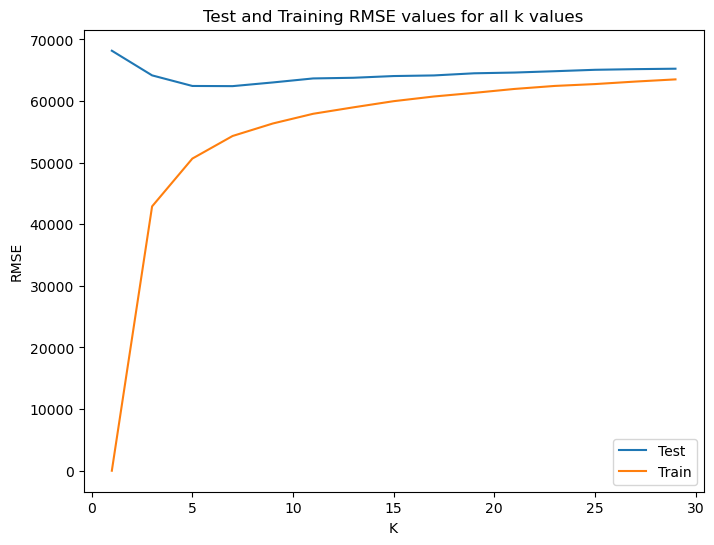

In [22]:
# YOUR CODE HERE
plt.plot(ks, test_rmse, label = 'Test')
plt.plot(ks, train_rmse, label = 'Train')
plt.legend()
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Test and Training RMSE values for all k values')

### Comments

_In the markup cell below, write about what you learned from your plot.  I would expect two or three sentences, but what's most important is that you write something thoughtful._

From the plot above, it shows that training values of k's RMSE is increasing exponentially while the testing values RMSE are decreasing exponentially

## Impact of noise predictors

_In class we heard that the KNN performance goes down if useless "noisy predictors" are present.  These are predictor that don't help in making predictions.  In this section, run KNN regression by adding one noise predictor to the data, then 2 noise predictors, then three, and then four.  For each, compute the training and test RMSE.  In every case, use k=10 as the k value and use the default Euclidean distance as the distance function._

_The add_noise_predictor() method makes it easy to add a predictor variable of random values to X_train or X_test._

In [23]:
def add_noise_predictor(X):
    """ add a column of random values to 2D array X """
    noise = np.random.normal(size=(X.shape[0], 1))
    return np.hstack((X, noise))

_Hint: In each iteration of your loop, add a noisy predictor to both X_train and X_test.  You don't need to worry about rescaling the data, as the new noisy predictor is already scaled.  Don't modify X_train and X_test however, as you will be using them again._

In [24]:
# YOUR CODE HERE
train_rmse_withN = []
test_rmse_withN = []
regr2 = KNeighborsRegressor(n_neighbors = 10)
copyXTrain = X_train.copy()
copyXTest = X_test.copy()
for i in range(5):
    copyXTrain = add_noise_predictor(copyXTrain)
    copyXTest = add_noise_predictor(copyXTest)
    
    regr2.fit(copyXTrain, y_train)
    
    predictTrain = regr2.predict(copyXTrain)
    predictTest = regr2.predict(copyXTest)
    
    train_rmse_withN.append(rmse(predictTrain, y_train))
    test_rmse_withN.append(rmse(predictTest, y_test))
    print(i, ' ', end = '')

print('done')

0  1  2  3  4  done


_Plot the percent increase in test RMSE as a function of the number of noise predictors.  The x axis will range from 0 to 4.  The y axis will show a percent increase in test RMSE._

_To compute percent increase in RMSE for n noise predictors, compute 100 * (rmse - base_rmse)/base_rmse, where base_rmse is the test RMSE with no noise predictors, and rmse is the test RMSE when n noise predictors have been added._

Text(0.5, 1.0, 'Percent increase in test RMSE by number of noise predictors')

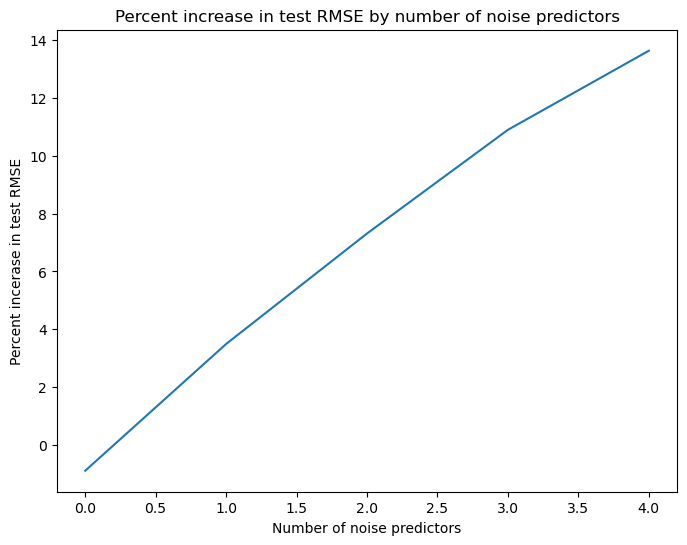

In [25]:
# YOUR CODE HERE
arrayData = np.array(test_rmse_withN)
percentInc = 100*(arrayData - test_rmse[0])/test_rmse[0]
plt.plot(percentInc)
plt.xlabel('Number of noise predictors')
plt.ylabel('Percent incerase in test RMSE')
plt.title('Percent increase in test RMSE by number of noise predictors')

### Comments

_Look at the results you obtained and add some thoughtful commentary._

It appears that the more number of noise predictors there are, the higher the percent increase in the test RMSE value. 

## Impact of scaling

_In class we learned that we should scaled the training data before using KNN.  How important is scaling with KNN?  Repeat the experiments you ran before (like in the impact of distance metric section), but this time use unscaled data._

_Run KNN as before but use the unscaled version of the data.  You will vary k as before.  Use algorithm='brute' and Euclidean distance._

In [26]:
# YOUR CODE HERE
n = 30
test_rmse_unscaled = []
train_rmse_unscaled = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train_raw, X_test_raw, y_train, y_test)
    train_rmse_unscaled.append(rmse_tr)
    test_rmse_unscaled.append(rmse_te)
print('done')

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done


_Print the best k and the test RMSE associated with the best k._

In [27]:
# YOUR CODE HERE
best_k, best_rmse = get_best(ks, test_rmse_unscaled)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

best k = 9, best test RMSE: 94057.4


_Plot training and test RMSE as a function of k.  Your plot title should note the use of unscaled data._

Text(0, 0.5, 'RMSE')

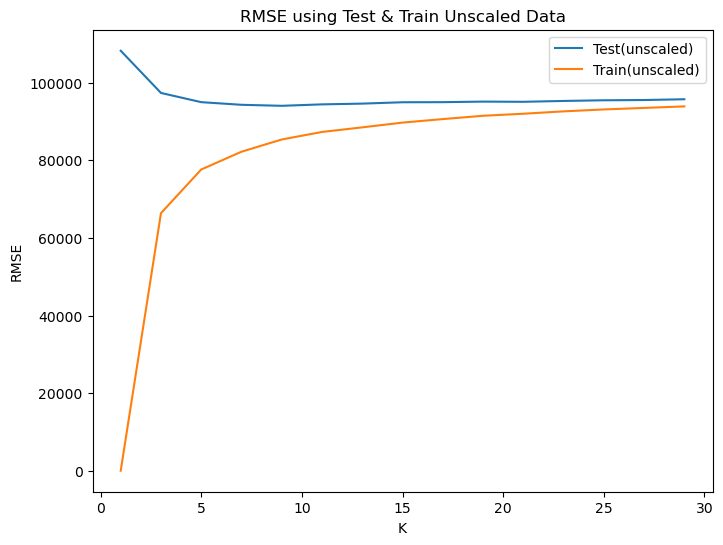

In [28]:
# YOUR CODE HERE
plt.plot(ks, test_rmse_unscaled, label = 'Test(unscaled)')
plt.plot(ks, train_rmse_unscaled, label = 'Train(unscaled)')
plt.title('RMSE using Test & Train Unscaled Data')
plt.legend()
plt.xlabel('K')
plt.ylabel('RMSE')

### Comments

_Reflect on what happened and provide some short commentary, as in previous sections._

By using the unscaled test and trianing data, it looks like the training data increases exponentially while the unscaled test data is decreasing exponentially. 

## Impact of algorithm

_We didn't discuss in class that there are variants of the KNN algorithm.  The main purpose of the variants is to be faster and to reduce that amount of training data that needs to be stored._

_Run experiments where you test each of the three KNN algorithms supported by Scikit-Learn: ball_tree, kd_tree, and brute.  In each case, use k=10 and use Euclidean distance._

In [29]:
n = 10
test_rmse_ball_tree = []
train_rmse_ball_tree= []

test_rmse_kd_tree = []
train_rmse_kd_tree = []

test_rmse_brute = []
train_rmse_brute = []

ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regrBallTree = KNeighborsRegressor(n_neighbors=k, algorithm='ball_tree')
    rmse_tr, rmse_te = get_train_test_rmse(regrBallTree, X_train, X_test, y_train, y_test)
    train_rmse_ball_tree.append(rmse_tr)
    test_rmse_ball_tree.append(rmse_te)
print("ball tree done")
for k in ks:
    print(k, ' ', end='')
    regrKd_Tree = KNeighborsRegressor(n_neighbors=k, algorithm='kd_tree')
    rmse_tr, rmse_te = get_train_test_rmse(regrKd_Tree, X_train, X_test, y_train, y_test)
    train_rmse_kd_tree.append(rmse_tr)
    test_rmse_kd_tree.append(rmse_te)
print('kd_tree done')
for k in ks:
    print(k, ' ', end='')
    regrBrute = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr, rmse_te = get_train_test_rmse(regrBrute, X_train, X_test, y_train, y_test)
    train_rmse_brute.append(rmse_tr)
    test_rmse_brute.append(rmse_te)
print("brute done")


1  3  5  7  9  ball tree done
1  3  5  7  9  kd_tree done
1  3  5  7  9  brute done


_Print the name of the best algorith, and the test RMSE achieved with the best algorithm._

In [30]:
# YOUR CODE HERE
best_k, best_rmse_ball_tree = get_best(ks, test_rmse_ball_tree)
print('best ball tree k = {}, best ball test RMSE: {:0.3f}'.format(best_k, best_rmse_ball_tree))

best_k, best_rmse_kd_tree = get_best(ks, test_rmse_kd_tree)
print('best kd tree k = {}, best kd tree test RMSE: {:0.3f}'.format(best_k, best_rmse_kd_tree))

best_k, best_rmse_brute = get_best(ks, test_rmse_brute)
print('best brute k = {}, best brute test RMSE: {:0.3f}'.format(best_k, best_rmse_brute))

best ball tree k = 7, best ball test RMSE: 62421.498
best kd tree k = 7, best kd tree test RMSE: 62421.498
best brute k = 7, best brute test RMSE: 62421.498


_Plot the test RMSE for each of the three algorithms as a bar plot._

Text(0.5, 1.0, 'RMSE for Different Algorithms')

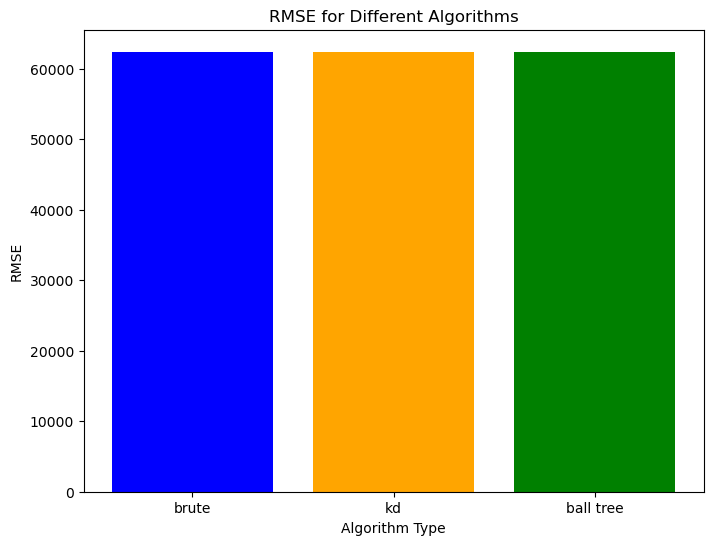

In [31]:
# YOUR CODE HERE
plt.bar(['brute','kd', 'ball tree'], [best_rmse_ball_tree, best_rmse_kd_tree, best_rmse_brute], color = ['blue', 'orange','green'])
plt.xlabel('Algorithm Type')
plt.ylabel('RMSE')
plt.title("RMSE for Different Algorithms")

### Comments

_As usual, reflect on the results and add comments._

Based on the plot above, it is obvious that all three algorithms have the same best rmse values as well as the same k values, k=7 and RMSE = 62421.498.

## Impact of weighting

_It was briefly mentioned in lecture that there is a variant of KNN in which training points are given more weight when they are closer to the point for which a prediction is to be made.  The 'weight' parameter of KNeighborsRegressor() has two possible values: 'uniform' and 'distance'.  Uniform is the basic algorithm._

_Run an experiment similar to the previous one.  Compute the test RMSE for uniform and distance weighting.  Using k = 10, the brute algorithm, and Euclidean distance._

In [32]:
# YOUR CODE HERE
test_rmse_uniform = []
train_rmse_uniform = []
test_rmse_distance = []
train_rmse_distance = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    uniformReg = KNeighborsRegressor(n_neighbors=k, algorithm='brute', weights = 'uniform')
    rmse_tr, rmse_te = get_train_test_rmse(uniformReg, X_train, X_test, y_train, y_test)
    train_rmse_uniform.append(rmse_tr)
    test_rmse_uniform.append(rmse_te)
print("uniform weight done")
for k in ks:
    print(k, ' ', end='')
    distanceReg = KNeighborsRegressor(n_neighbors=k, algorithm='brute', weights = 'distance')
    rmse_tr, rmse_te = get_train_test_rmse(distanceReg, X_train, X_test, y_train, y_test)
    train_rmse_distance.append(rmse_tr)
    test_rmse_distance.append(rmse_te)
print("distance weight done")



1  3  5  7  9  uniform weight done
1  3  5  7  9  distance weight done


_Print the weighting the gave the lowest test RMSE, and the test RMSE it achieved._

In [33]:
# YOUR CODE HERE
best_k, best_rmse_uniform = get_best(ks, test_rmse_uniform)
print('best k = {}, best ball test RMSE: {:0.3f}'.format(best_k, best_rmse_uniform))

best_k, best_rmse_distance = get_best(ks, test_rmse_distance)
print('best k = {}, best kd tree test RMSE: {:0.3f}'.format(best_k, best_rmse_distance))


best k = 7, best ball test RMSE: 62421.498
best k = 7, best kd tree test RMSE: 55800.710


_Create a bar plot showing the test RMSE for the uniform and distance weighting options._

Text(0.5, 1.0, 'RMSE for Uniform and Distance Weighting Options')

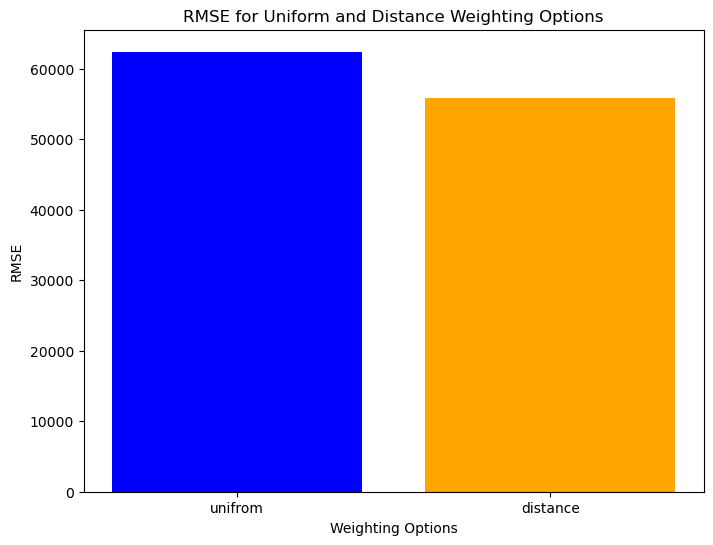

In [34]:
# YOUR CODE HERE
plt.bar(['unifrom','distance'], [best_rmse_uniform, best_rmse_distance], color = ['blue', 'orange'])
plt.xlabel('Weighting Options')
plt.ylabel('RMSE')
plt.title("RMSE for Uniform and Distance Weighting Options")

### Comments

_As usual, reflect and comment._

Based on the bar plot above, it shows that setting the weights parameter in the KNeighborRegressor() function actually changes the best RMSE value. Specifically shown here, setting the weights to uniform(62421.498) provides a higher RMSE value compared to the RMSE value of the weight option of distance (55800.710)

## Conclusions

_Please provide at least a few sentences of commentary on the main things you've learned from the experiments you've run._

After completing all of these experimental problems, it was interesting to see how a simple parameter can heavily change the RMSE value. I learned specifically how different algorithms (brute, ball_tree, kd_tree) can still result in the same best RMSE values. I also was able to get a better idea of the way unscaled data differs from scaled data and visually compare the two in the plotted graphs and seeing how imporant scaling data really is. 